# Decision Tree in ML 

- In the realm of Machine Learning, a decision tree is a versatile algorithm classified as supervised learning.
- It learns from labeled data to make predictions on unseen data. 
- It excels in both classification (predicting categories) and regression (predicting continuous values) tasks.

## Visualizing the Structure:

Imagine a tree structure, where:

- The root node represents the initial decision point, often corresponding to the entire dataset.
- Branches stem from the root node, each representing a possible outcome of the decision at that node.
- Internal nodes (also called decision nodes) further divide the data based on specific features (attributes) of the data points.
- Each branch leads to a leaf node (terminal node), which signifies the final prediction or classification for that particular path through the tree.

## How it Works

- Training: The decision tree is trained on a dataset with labeled data points.
- Splitting: At each internal node, the algorithm recursively splits the data into subsets based on a splitting criterion. This criterion chooses the feature and the specific value that best separates the data points into distinct groups, aiming to minimize impurity (how well-mixed the classes are within each group). Common impurity measures include entropy (classification) and variance (regression).
- Growing: The process continues until a stopping criterion is met, such as reaching a maximum depth of the tree, having pure groups (all data points in a group belong to the same class), or when further splitting no longer improves the model's performance.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r'C:\Users\HP\Desktop\decision_tree_dataset.csv')

In [6]:
data

,outlook,humidity,windy,play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,overcast,normal,weak,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rainy,normal,weak,yes


In [7]:
from sklearn.preprocessing import LabelEncoder

In [9]:
outlook = LabelEncoder()
humidity = LabelEncoder()
windy  = LabelEncoder()
play = LabelEncoder()

In [10]:
data['outlook'] = outlook.fit_transform(data['outlook'])
data['humidity'] = humidity.fit_transform(data['humidity'])
data['windy'] = windy.fit_transform(data['windy'])
data['play'] = play.fit_transform(data['play'])

In [11]:
data

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,1,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [15]:
x = data[['outlook','humidity','windy']]

In [16]:
y = data['play']

In [17]:
x

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [18]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Using gini criterion
classifier = DecisionTreeClassifier(criterion='gini')

In [29]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [30]:
classifier.predict(xtest)

array([1, 1, 1])

In [32]:
classifier.score(xtest,ytest)

0.6666666666666666

[Text(0.375, 0.9, 'x[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

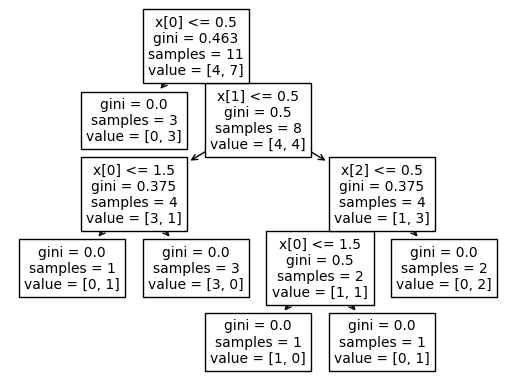

In [33]:
from sklearn import tree
tree.plot_tree(classifier)

In [34]:
# Using entropy criterion
classifier1 = DecisionTreeClassifier(criterion='entropy')

In [41]:
classifier1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [42]:
classifier1.predict(xtest)

array([1, 1, 1])

In [46]:
classifier1.score(xtest,ytest)

0.6666666666666666

[Text(0.375, 0.9, 'x[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

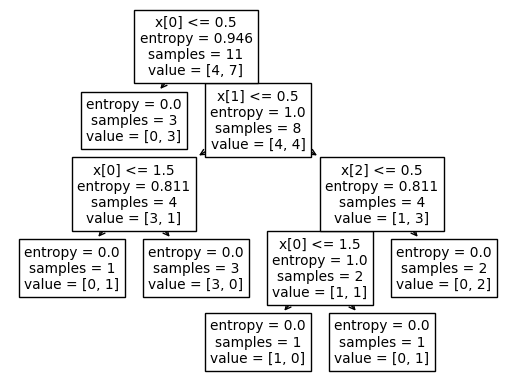

In [47]:
tree.plot_tree(classifier1)